**MODELO EXPONENCIAL Y POLINOMIAL**

Los datos con los que se aplica los modelos son obtenido del siguiente enlace, en donde se aprecio los casos de covid-19 en el mundo:https://github.com/CSSEGISandData/COVID-19

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
url = 'C:/Users/china/Downloads/Kary-Sim/Kary-Sim/who_covid_19_sit_rep_time_series.csv'

df = pd.read_csv(url)
df

,Date,Cases
0,3/1/2020,1
1,3/2/2020,1
2,3/3/2020,6
3,3/4/2020,7
4,3/5/2020,7
5,3/6/2020,13
6,3/7/2020,14
7,3/8/2020,14
8,3/9/2020,15
9,3/10/2020,15


In [6]:
FMT = '%m/%d/%Y'
date = df['Date']
df['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("3/1/2020", FMT)).days)

df

,Date,Cases
0,0,1
1,1,1
2,2,6
3,3,7
4,4,7
5,5,13
6,6,14
7,7,14
8,8,15
9,9,15


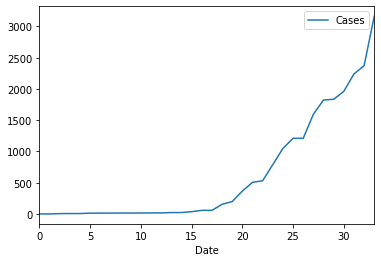

In [7]:
df.plot(x ='Date', y='Cases')

**MODELO EXPONENCIAL**

Mientras que el modelo logístico describe un crecimiento de infección que se detendrá en el futuro, el modelo exponencial describe un crecimiento de infección imparable . Por ejemplo, si un paciente infecta a 2 pacientes por día, después de 1 día tendremos 2 infecciones, 4 después de 2 días, 8 después de 3 y así sucesivamente.

[0.23845473 0.63654684]


C:\Users\china\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


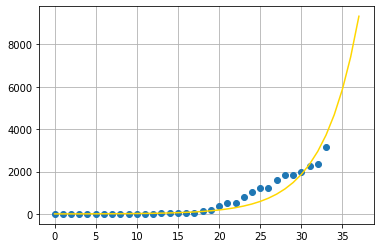

In [8]:
##Predecir 5 días mas, para que se aprecie mejor la gráfica
x = np.array(df['Date'])
pred_x = np.array(list(range(min(x),max(x)+5)))
y = list(df.iloc [:, 1])
xd = np.log(x)
yd = np.log(y)

##Ajuste polinomial
curve_fit = np.polyfit(x,yd, deg=1)
print(curve_fit)

yx = np.exp(0.63) * np.exp(0.23*pred_x)
plt.plot(x, y, "o")
plt.plot(pred_x, yx, color='gold')
plt.grid(True)

**Modelo Polinomial**

Predicción de una variable de respuesta cuantitativa a partir de una variable predictora cuantitativa, donde la relación se modela como una función polinomial de orden n (esto significa que pueden tener de diferentes exponenciales o grados y se debe ir probando)

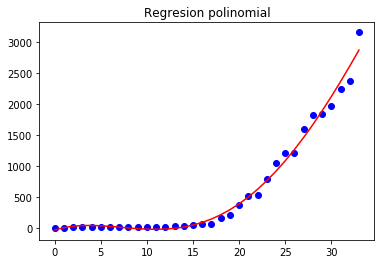

In [73]:
X = df.iloc[:, 0:1].values 
lin = LinearRegression() 
  
lin.fit(X, y) 
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
plt.scatter(X, y, color = 'blue') 
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Regresion polinomial')                   
plt.show() 


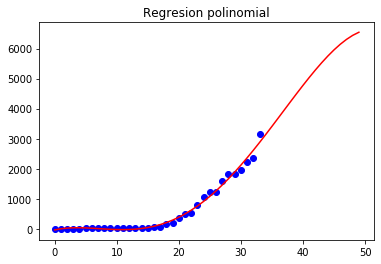

In [72]:
plt.scatter(X, y, color = 'blue') 
##Prediccion de 50 dias mas
X1 = np.array(range(0,50))
pre = lin2.predict(poly.fit_transform(X1.reshape(-1, 1)))
plt.plot(X1, pre, color = 'r') 
plt.title('Regresion polinomial') 
               
plt.show() 

**ANALISIS**

Los modelos de regresión para la predicción son frecuentemente útiles aunque los supuestos sean violados moderamente, aunque no pueden funcionar de manera óptima. Como lo es en este caso los datos que usamos del covid-19.

**CONCLUSIONES**

Los modelos de regresión exponencial como polinomial, usan métodos distintos para predecir el valor de una variable en función de otro valores asignados a otra variable, para asi mejorar el ajuste del modelo y posteriormente analizar la precisión del mismo. Sin embargo el uso de los modelos de regresión de forma general dependera únicamente del caso que se vaya a analizar. Estos modelos de análisis son un proceso estadístico para estimar las relaciones entre variables. Más específicamente, el análisis de regresión ayuda a entender cómo el valor de la variable dependiente varía al cambiar el valor de una de las variables independientes, manteniendo el valor de las otras variables independientes fijas. El desempeño de los métodos de análisis de regresión en la práctica depende de la forma del proceso de generación de datos, y cómo se relaciona con el método de regresión que se utiliza.

**CRITERIO PERSONAL**

Sabemos que dada la situación actual la economía reducira a gran escala independientemente de lo que el gobierno tenga como plan de contingencia, es algo que pasará y para lo cual debemos prepararnos. Por otro lado el gobierno a tratado de imponer medidas de seguridad y precaución para evitar que el virus se expanda y que como resultado no ha generado más que controversia por el lado de los que "les da igual" y aceptación por aquellos que comparten la misma noción y sentido de responsabilidad. Esta claro que cada quien vive bajo su opinión y por su propio beneficio. :D